# Adding outline stroke to plotnine annotations

When you plot text on top of busy charts, sometimes the text blends in with the details in the chart underneath. In this guide we'll use matplotlib's `text_effects` to make text on top of a  chart readable.

## Read in our data

We have two datasets: the original data, and the annotations we want to put on the graphic.

In [6]:
import pandas as pd
from plotnine import *

df = pd.read_csv("countries.csv")
df.head()

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856
2,Algeria,Africa,5098,68.963,30533827
3,Angola,Africa,2446,45.234,13926373
4,Antigua and Barbuda,N. America,12738,73.544,77656


In [7]:
annotations = df[df.country.isin(['Tonga', 'Angola', 'Iceland'])]
annotations

,country,continent,gdp_per_capita,life_expectancy,population
3,Angola,Africa,2446,45.234,13926373
74,Iceland,Europe,31092,79.720,281210
169,Tonga,Oceania,4886,70.810,97935


## The problem

When you plot text on top of busy charts, sometimes the text blends in with the details in the chart underneath.

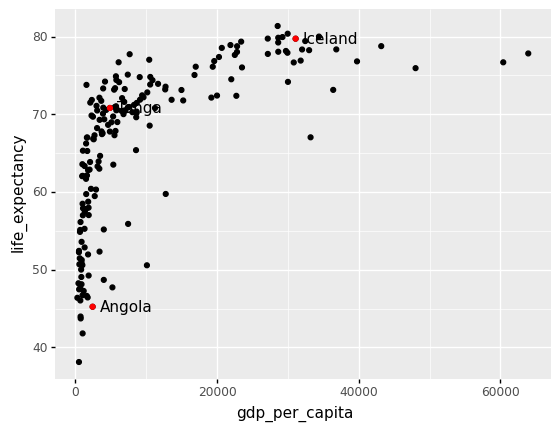

<ggplot: (312649858)>

In [8]:
(
    ggplot(df)
    + aes(x='gdp_per_capita', y='life_expectancy', label='country')
    + geom_point(color='black')
    + geom_point(annotations, color='red')
    + geom_text(annotations, ha='left', nudge_x=1000)
)

To help the text stand out, we will add an outline to it.

## Adding stroke to text annotations

To add an outline to our text, we will use the [matplotlib's path effects](https://matplotlib.org/stable/tutorials/advanced/patheffects_guide.html). The simplest way is using `withStroke`.

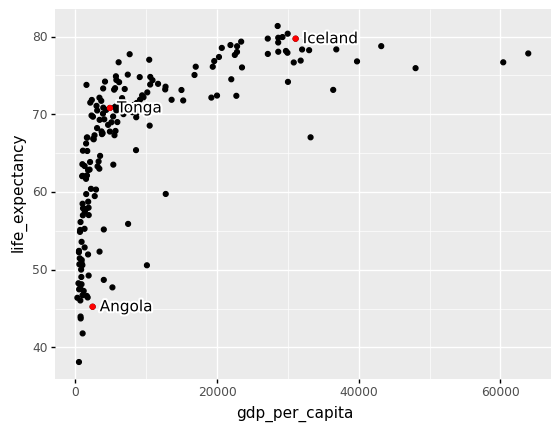

<ggplot: (311895471)>

In [26]:
import matplotlib.patheffects as path_effects

(
    ggplot(df)
    + aes(x='gdp_per_capita', y='life_expectancy', label='country')
    + geom_point(color='black')
    + geom_point(annotations, color='red')
    + geom_text(annotations,
                ha='left',
                nudge_x=1000,
                path_effects=[
                    path_effects.withStroke(linewidth=3, foreground='white')
                ])
)

By giving it a `linewidth` and a `foreground`, you get a certain thickness of border around your text label. Now you can read it!